In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

图像缩放
resize(img, dst, dsize, fx, fy, interpolation)
    img: 图像
    dst: python中无用，C++中返回值
    dsize: 缩放大小
    fx, fy: 缩放比例
    interpolation: 插值方式
        cv.INTER_LINEAR : 线性插值，
        cv.INTER_NEAREST : 邻近插值，原图4个点
        cv.INTER_CUBIC : 三次插值，原图16个点
        cv.INTER_AREA

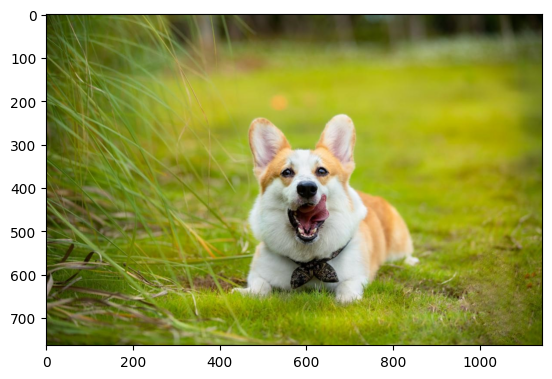

In [38]:
img = cv.imread("./data/img/dog.jpeg")
new_img = cv.resize(img, dsize=(2560, 1600))
new_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(new_img)
plt.show()

图像翻转
flip(img, flipCode)
    img: 图像
    flipCode: 翻转属性
        == 0 上下
        > 0, 左右
        < 0, 上下+左右

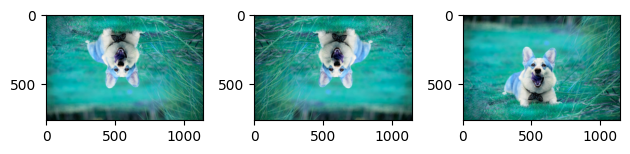

In [39]:
fig, axs = plt.subplots(1, 3)
for i in range(3):
    axs[i].imshow(cv.flip(img, i - 1))
plt.tight_layout()
plt.show()

图像旋转
rotate(img, rotateCode)
    img: 图像
    flipCode: 旋转属性
        cv.ROTATE_90_CLOCKWISE : 90°
        cv.ROTATE_180 : 180°
        cv.ROTATE_90_COUNTERCLOCKWISE : 270°

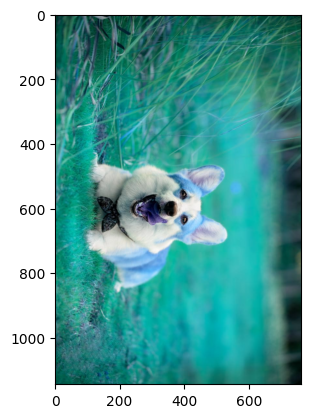

In [40]:
new_img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
plt.imshow(new_img)
plt.show()

图片的仿射变换
cv.warpAffine(src, M, dsize, dst, flags, borderMode, borderValue)
    src: 原始图像
    M: 变换矩阵
    dsize: 缩放后的大小
    flags: 插值模型
    borderMode: 边界模型（是否填充之类的）
    borderValue: 边界填充的数字

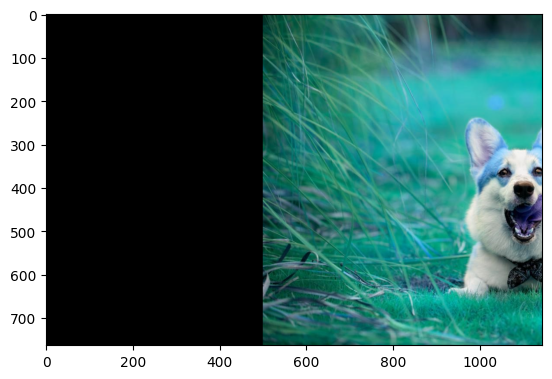

In [48]:
M = np.float32([[1.0, 0.0, 500.], [0.0, 1.0, 0]])
h, w, c = img.shape # 高宽通道
new_img = cv.warpAffine(img, M, dsize=(w, h))
plt.imshow(new_img)
plt.show()

仿射矩阵·一
通过中心点，旋转角度，缩放比例来控制
cv2.getRotationMatrix2D(center: cv2.typing.Point2f, angle: float, scale: float)
    center: 中心点 (x, y) 宽高
    angle: 角度 - 逆时针旋转
    scale: 缩放比例

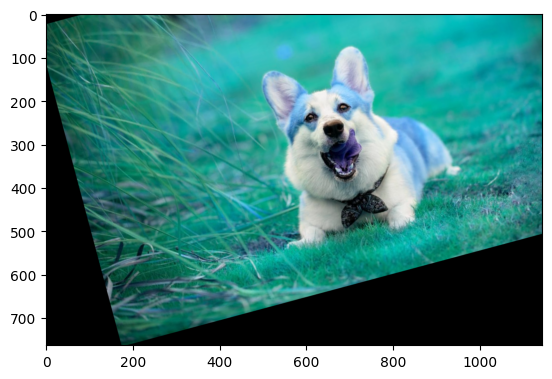

In [49]:
M = cv.getRotationMatrix2D((100, 100), 15., 1.)
new_img = cv.warpAffine(img, M, dsize=(w, h))
plt.imshow(new_img)
plt.show()

仿射矩阵·二
通过源和目的的点进行映射
cv2.getAffineTransform(src, dst)
    src: 源坐标·三维
    dst: 目的坐标·三维

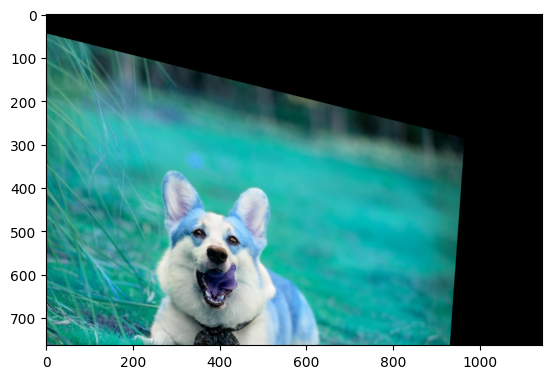

In [51]:
src = np.float32([[400,300], [800,300], [400, 1000]])
dst = np.float32([[200,400], [600,500], [150, 1100]])
M = cv.getAffineTransform(src, dst)
new_img = cv.warpAffine(img, M, dsize=(w, h))
plt.imshow(new_img)
plt.show()

透视变换
在不同坐标轴之间变换
cv.warpPerspective(src, M, dsize, dst, flags, borderMode, borderValue)
    src: 原始图像
    M: 变换矩阵
    dsize: 缩放后的大小
    flags: 插值模型
    borderMode: 边界模型（是否填充之类的）
    borderValue: 边界填充的数字

转换矩阵
cv.getPerspectiveTransform(src, dst, solveMethod)
    src: 源坐标·四维
    dst: 目的坐标·四维

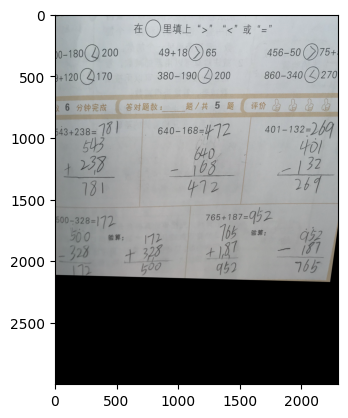

In [61]:
math_img = cv.imread("./data/img/math.png")
src = np.float32([[100,1100], [2100,1100], [0, 4000], [2500, 3900]])
dst = np.float32([[0,0], [2300,0], [0, 3000], [2300, 3000]])
M = cv.getPerspectiveTransform(src, dst)
new_math_img = cv.warpPerspective(math_img, M, (2300, 3000))
plt.imshow(new_math_img)
plt.show()